In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,ttest_ind,spearmanr,shapiro

import warnings
warnings.filterwarnings("ignore")

In [55]:
df=pd.read_csv("cars_info.csv")
df

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [57]:
df.drop("ID",axis=1,inplace=True)

In [58]:
df.head()

,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              17048 non-null  object
 1   Price             17048 non-null  int64 
 2   Brand             17048 non-null  object
 3   Model             17048 non-null  object
 4   Variant           17048 non-null  object
 5   Series            17048 non-null  object
 6   Year              17048 non-null  int64 
 7   Kilometers        17048 non-null  int64 
 8   Type              17048 non-null  object
 9   Gearbox           17048 non-null  object
 10  Fuel              17048 non-null  object
 11  Status            17048 non-null  object
 12  CC                17048 non-null  int64 
 13  Color             17048 non-null  object
 14  Seating Capacity  17048 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 2.0+ MB


In [60]:
df["Name"]

0                        2010 Toyota Rukus Build 2 AZE151R
1        2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...
2        2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...
3               2010 Mercedes-Benz E250 CDI Avantgarde 207
4                             2016 Holden Cruze CD JH MY16
                               ...                        
17043                   2003 Holden Commodore Executive VY
17044                          2008 Toyota Yaris YR NCP90R
17045                 2002 Holden Jackaroo SE LWB (4X4) U8
17046                 2016 Hyundai I30 Active GD4 Series 2
17047                2005 Toyota RAV4 Cruiser (4X4) ACA23R
Name: Name, Length: 17048, dtype: object

In [61]:
df.duplicated().sum()

np.int64(65)

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.drop("Name",axis=1,inplace=True)

In [65]:
df

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [66]:
df.Price*55.04

0         550344.96
1        6494169.60
2        4402649.60
3        1925849.60
4         880089.60
            ...    
17043     247624.96
17044     275144.96
17045     440264.96
17046     770560.00
17047     330184.96
Name: Price, Length: 16983, dtype: float64

In [67]:
df["Price"]=df.Price*55.04

In [68]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,6494169.60,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [69]:
df.sample(5)

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
6120,1265369.60,Hyundai,I30,Premium 1.6 Crdi,GD3 Series 2,2016,63225,Hatchback,Automatic,Diesel,Used,1582,Grey,5
3800,1210824.96,Audi,TT,S-Line,8N,2005,133000,Coupe,Manual,Premium Unleaded Petrol,Used,1781,Blue,4
7171,8145920.00,Porsche,Macan,GTS,95B MY20,2020,21633,Wagon,Automatic,Premium Unleaded Petrol,Used,2894,Grey,5
7139,767808.00,Hyundai,I30,SE,GD,2013,125139,Hatchback,Automatic,Unleaded Petrol,Used,1591,Blue,5
14012,1100744.96,Hyundai,I30,Active,GD4 Series 2,2016,84478,Hatchback,Automatic,Unleaded Petrol,Used,1797,Silver,5


In [70]:
np.round(df["Price"].describe(),decimals=2)

count       16983.00
mean      2023332.99
std       1669637.53
min         55040.00
25%       1034724.48
50%       1650649.60
75%       2531289.60
max      54984960.00
Name: Price, dtype: float64

<Axes: >

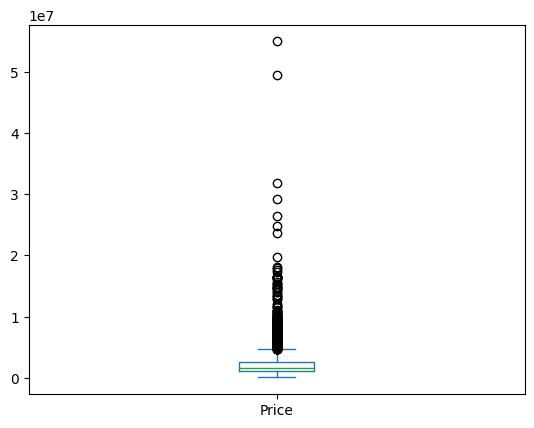

In [71]:
df["Price"].plot.box()

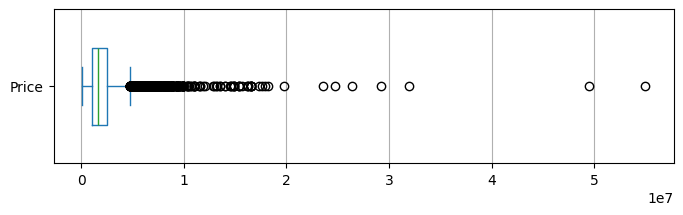

In [72]:
plt.figure(figsize=(8,2))
df["Price"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

In [73]:
df["Price"].quantile(0.9)

np.float64(3731579.9040000006)

In [74]:
df["Price"].quantile(0.99)

np.float64(7484988.672)

In [75]:
df["Price"].quantile((0.9,0.95,0.97,0.975,0.99))

0.900    3731579.904
0.950    4677849.600
0.970    5503449.600
0.975    6045373.440
0.990    7484988.672
Name: Price, dtype: float64

In [76]:
df[df["Price"]<=6045373.440]

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,247624.96,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,275144.96,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,440264.96,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,770560.00,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


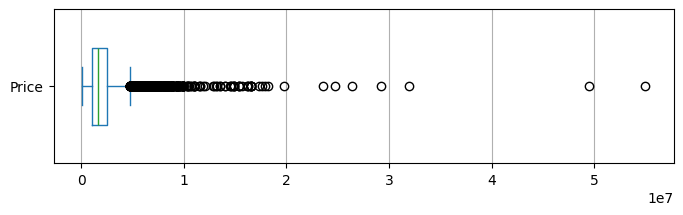

In [77]:
plt.figure(figsize=(8,2))
df["Price"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

In [78]:
df=df[df["Price"]<=6045373.440]

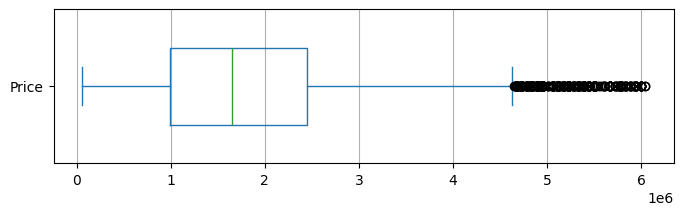

In [79]:
plt.figure(figsize=(8,2))
df["Price"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

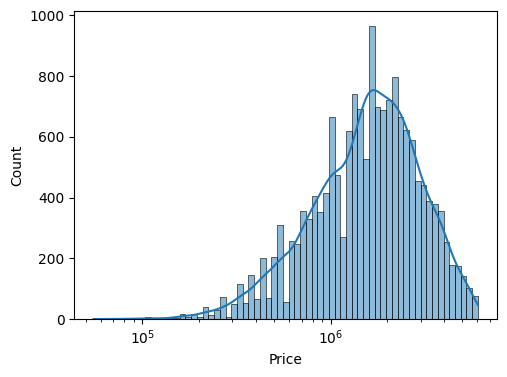

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["Price"],kde=True,log_scale=True)
plt.show()

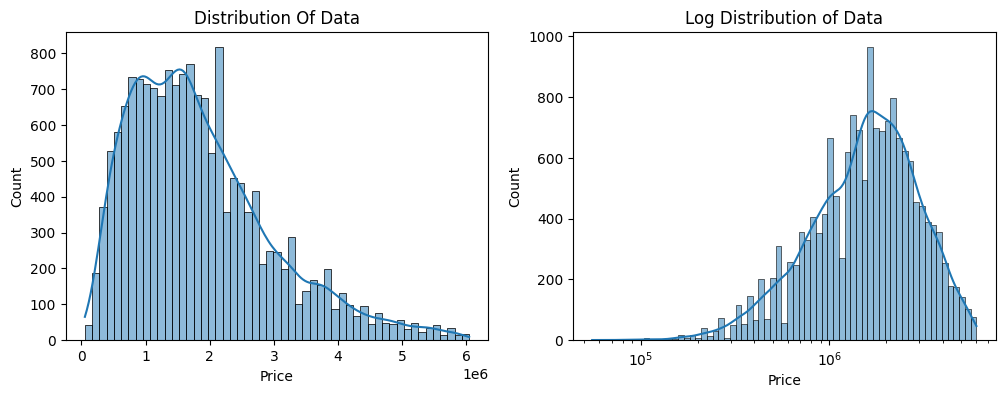

In [81]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["Price"],kde=True)
plt.title("Distribution Of Data")

plt.subplot(1,2,2)
sns.histplot(df["Price"],kde=True,log_scale=True)
plt.title("Log Distribution of Data")
plt.show()

In [82]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5


In [83]:
df["Brand"].value_counts()

Brand
Toyota             2648
Holden             1498
Ford               1487
Mazda              1164
Hyundai            1086
Mitsubishi         1072
Nissan             1004
Volkswagen          991
Kia                 742
Subaru              654
Mercedes-Benz       539
Audi                473
BMW                 441
Honda               412
Jeep                374
Isuzu               267
Land Rover          240
Lexus               173
Suzuki              160
Skoda               158
Volvo               155
Renault             150
LDV                 116
MG                   95
Mini                 66
Porsche              49
Peugeot              45
Chrysler             42
Jaguar               35
HSV                  34
GWM                  28
Great Wall           27
Fiat                 17
Dodge                14
Citroen              13
Ram                  13
Ssangyong            11
Alfa Romeo           11
Infiniti              9
Haval                 7
Maserati              7
Abarth    

In [84]:
df["Brand"].value_counts()<100

Brand
Toyota             False
Holden             False
Ford               False
Mazda              False
Hyundai            False
Mitsubishi         False
Nissan             False
Volkswagen         False
Kia                False
Subaru             False
Mercedes-Benz      False
Audi               False
BMW                False
Honda              False
Jeep               False
Isuzu              False
Land Rover         False
Lexus              False
Suzuki             False
Skoda              False
Volvo              False
Renault            False
LDV                False
MG                  True
Mini                True
Porsche             True
Peugeot             True
Chrysler            True
Jaguar              True
HSV                 True
GWM                 True
Great Wall          True
Fiat                True
Dodge               True
Citroen             True
Ram                 True
Ssangyong           True
Alfa Romeo          True
Infiniti            True
Haval              

In [85]:
pd.DataFrame(df["Brand"].value_counts()<100)

,count
Brand,
Toyota,False
Holden,False
Ford,False
Mazda,False
Hyundai,False
Mitsubishi,False
Nissan,False
Volkswagen,False
Kia,False


In [86]:
brand_count=df["Brand"].value_counts()
brand_count

Brand
Toyota             2648
Holden             1498
Ford               1487
Mazda              1164
Hyundai            1086
Mitsubishi         1072
Nissan             1004
Volkswagen          991
Kia                 742
Subaru              654
Mercedes-Benz       539
Audi                473
BMW                 441
Honda               412
Jeep                374
Isuzu               267
Land Rover          240
Lexus               173
Suzuki              160
Skoda               158
Volvo               155
Renault             150
LDV                 116
MG                   95
Mini                 66
Porsche              49
Peugeot              45
Chrysler             42
Jaguar               35
HSV                  34
GWM                  28
Great Wall           27
Fiat                 17
Dodge                14
Citroen              13
Ram                  13
Ssangyong            11
Alfa Romeo           11
Infiniti              9
Haval                 7
Maserati              7
Abarth    

In [87]:
brand_count=df["Brand"].value_counts().reset_index()
brand_count

,Brand,count
0,Toyota,2648
1,Holden,1498
2,Ford,1487
3,Mazda,1164
4,Hyundai,1086
5,Mitsubishi,1072
6,Nissan,1004
7,Volkswagen,991
8,Kia,742
9,Subaru,654


In [88]:
low_brand_count=brand_count[brand_count["count"]<=100]["Brand"].values
low_brand_count

array(['MG', 'Mini', 'Porsche', 'Peugeot', 'Chrysler', 'Jaguar', 'HSV',
       'GWM', 'Great Wall', 'Fiat', 'Dodge', 'Citroen', 'Ram',
       'Ssangyong', 'Alfa Romeo', 'Infiniti', 'Haval', 'Maserati',
       'Abarth', 'Cupra', 'Opel', 'Foton', 'Saab', 'Chery', 'Hino',
       'Iveco', 'Mitsubishi Fuso', 'FPV', 'Genesis', 'Mahindra',
       'Bentley', 'Smart', 'Proton'], dtype=object)

In [89]:
df=df[-(df["Brand"].isin(low_brand_count))]
df["Brand"].value_counts()

Brand
Toyota           2648
Holden           1498
Ford             1487
Mazda            1164
Hyundai          1086
Mitsubishi       1072
Nissan           1004
Volkswagen        991
Kia               742
Subaru            654
Mercedes-Benz     539
Audi              473
BMW               441
Honda             412
Jeep              374
Isuzu             267
Land Rover        240
Lexus             173
Suzuki            160
Skoda             158
Volvo             155
Renault           150
LDV               116
Name: count, dtype: int64

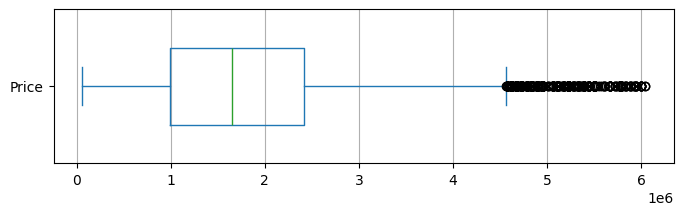

In [90]:
plt.figure(figsize=(8,2))
df["Price"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

In [91]:
df["Year"].min(),df["Year"].max()

(np.int64(1989), np.int64(2022))

In [92]:
df[df["Year"]<=2009]

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
8,852569.60,Holden,Statesman,International,WL,2005,172151,Sedan,Automatic,Unleaded Petrol,Used,5665,Blue,5
9,852569.60,Holden,Commodore,Berlina,Vyii,2003,186990,Sedan,Automatic,Unleaded Petrol,Used,5665,Green,5
18,495360.00,Ford,Falcon,XR6,FG,2009,298000,Sedan,Automatic,Unleaded Petrol,Used,3984,silver,5
27,2145459.20,Nissan,Patrol,ST (4X4),GU IV,2004,282190,Wagon,Manual,Diesel,Used,4169,Gold,7
29,1045209.60,Toyota,Landcruiser Prado,GXL (4X4),KZJ120R,2004,383514,Wagon,Manual,Diesel,Used,2982,White,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17023,494809.60,Toyota,Aurion,AT-X,GSV40R,2007,218614,Sedan,Automatic,Unleaded Petrol,Used,3456,Silver,5
17043,247624.96,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,275144.96,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,440264.96,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7


In [93]:
df=df[df["Year"]>=2010]
df

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17039,1403520.00,Audi,A4,2.0 Tfsi Quattro,B8 (8K) MY14,2014,87000,Sedan,Automatic,Premium Unleaded Petrol,Used,1984,Blue,5
17040,1320960.00,Hyundai,I30,GO,PD,2018,24909,Hatchback,Automatic,Unleaded Petrol,Used,1999,White,5
17041,3467520.00,Land Rover,Discovery 4,3.0 SDV6 HSE,MY15,2015,128225,Wagon,Automatic,Diesel,Used,2993,Grey,7
17042,1045760.00,Mercedes-Benz,ML300,CDI (4X4),W164 09 Upgrade,2010,163514,Wagon,Automatic,Diesel,Used,2987,Silver,5


In [94]:
df["Year"].min(),df["Year"].max()

(np.int64(2010), np.int64(2022))

In [95]:
df["Kilometers"].describe()

count     14082.000000
mean      92255.422170
std       66139.794779
min           2.000000
25%       42792.250000
50%       81362.000000
75%      132065.500000
max      583000.000000
Name: Kilometers, dtype: float64

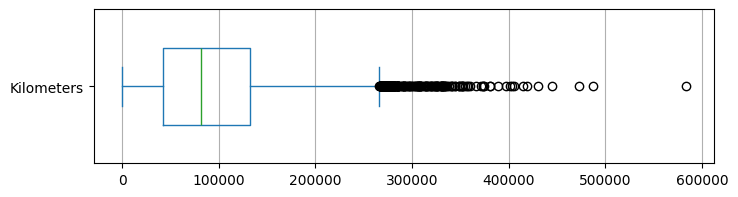

In [96]:
plt.figure(figsize=(8,2))
df["Kilometers"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

In [97]:
df[df["Kilometers"]<=300000]

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17039,1403520.00,Audi,A4,2.0 Tfsi Quattro,B8 (8K) MY14,2014,87000,Sedan,Automatic,Premium Unleaded Petrol,Used,1984,Blue,5
17040,1320960.00,Hyundai,I30,GO,PD,2018,24909,Hatchback,Automatic,Unleaded Petrol,Used,1999,White,5
17041,3467520.00,Land Rover,Discovery 4,3.0 SDV6 HSE,MY15,2015,128225,Wagon,Automatic,Diesel,Used,2993,Grey,7
17042,1045760.00,Mercedes-Benz,ML300,CDI (4X4),W164 09 Upgrade,2010,163514,Wagon,Automatic,Diesel,Used,2987,Silver,5


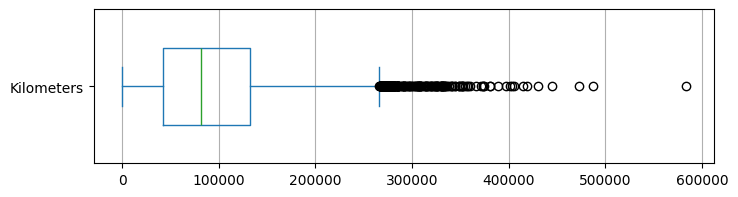

In [98]:
plt.figure(figsize=(8,2))
df["Kilometers"].plot.box(vert=False,widths=0.5)
plt.grid(axis="x")
plt.show()

In [99]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5


In [100]:
df["Gearbox"].value_counts()

Gearbox
Automatic    12319
Manual        1746
AWD             13
Front            4
Name: count, dtype: int64

In [101]:
df=df[df["Gearbox"].isin(["Automatic","Manual"])]

In [102]:
df["Gearbox"].value_counts()

Gearbox
Automatic    12319
Manual        1746
Name: count, dtype: int64

In [103]:
df["Fuel"]

0                Unleaded Petrol
2                         Diesel
3                         Diesel
4                Unleaded Petrol
5                Unleaded Petrol
                  ...           
17039    Premium Unleaded Petrol
17040            Unleaded Petrol
17041                     Diesel
17042                     Diesel
17046            Unleaded Petrol
Name: Fuel, Length: 14065, dtype: object

In [104]:
df["Fuel"].value_counts()

Fuel
Unleaded Petrol              5641
Diesel                       5368
Premium Unleaded Petrol      2627
Unleaded Petrol/Electric      247
Premium Unleaded/Electric     148
Liquid Petroleum Gas           26
Diesel/Electric                 8
Name: count, dtype: int64

In [105]:
df["Fuel"]=df["Fuel"].str.replace("Unleaded Petrol/Electric","Hybrid")
df["Fuel"]=df["Fuel"].str.replace("Premium Unleaded/Electric","Hybrid")
df["Fuel"]=df["Fuel"].str.replace("Diesel/Electric","Hybrid")
df["Fuel"]=df["Fuel"].str.replace("Unleaded Petrol","Petrol")
df["Fuel"]=df["Fuel"].str.replace("Premium Unleaded Petrol","Petrol")

In [106]:
df["Fuel"].value_counts()

Fuel
Petrol                  5641
Diesel                  5368
Premium Petrol          2627
Hybrid                   403
Liquid Petroleum Gas      26
Name: count, dtype: int64

In [107]:
df["Status"].value_counts()

Status
Used            13455
Demo              326
New In Stock      284
Name: count, dtype: int64

In [108]:
df["CC"].describe()

count    14065.000000
mean      2406.079701
std        779.603949
min        898.000000
25%       1987.000000
50%       2199.000000
75%       2776.000000
max       6424.000000
Name: CC, dtype: float64

In [207]:
df["Color"].value_counts()

Color
White       5394
Grey        2085
Silver      1910
Black       1539
Blue        1275
            ... 
light          1
Missano        1
Velocity       1
Glazier        1
yellow         1
Name: count, Length: 187, dtype: int64

In [208]:
df["Seating Capacity"].describe()

count    14065.000000
mean         5.137149
std          1.092118
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         14.000000
Name: Seating Capacity, dtype: float64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14065 entries, 0 to 17046
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             14065 non-null  float64 
 1   Brand             14065 non-null  object  
 2   Model             14065 non-null  object  
 3   Variant           14065 non-null  object  
 4   Series            14065 non-null  object  
 5   Year              14065 non-null  int64   
 6   Kilometers        14065 non-null  int64   
 7   Type              14065 non-null  object  
 8   Gearbox           14065 non-null  object  
 9   Fuel              14065 non-null  object  
 10  Status            14065 non-null  object  
 11  CC                14065 non-null  int64   
 12  Color             14065 non-null  object  
 13  Seating Capacity  14065 non-null  int64   
 14  Engine Capacity   14065 non-null  category
dtypes: category(1), float64(1), int64(4), object(9)
memory usage: 1.6+ MB


In [210]:
df.reset_index(drop=True,inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14065 entries, 0 to 14064
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             14065 non-null  float64 
 1   Brand             14065 non-null  object  
 2   Model             14065 non-null  object  
 3   Variant           14065 non-null  object  
 4   Series            14065 non-null  object  
 5   Year              14065 non-null  int64   
 6   Kilometers        14065 non-null  int64   
 7   Type              14065 non-null  object  
 8   Gearbox           14065 non-null  object  
 9   Fuel              14065 non-null  object  
 10  Status            14065 non-null  object  
 11  CC                14065 non-null  int64   
 12  Color             14065 non-null  object  
 13  Seating Capacity  14065 non-null  int64   
 14  Engine Capacity   14065 non-null  category
dtypes: category(1), float64(1), int64(4), object(9)
memory usage: 1.5+ MB


In [213]:
np.round(df.groupby("Brand")["Price"].mean().sort_values(ascending=False),decimals=2)

Brand
Mercedes-Benz    3041880.46
Land Rover       3033173.53
Lexus            2962758.93
Volvo            2882758.94
BMW              2780242.83
Audi             2466409.46
Isuzu            2374261.31
Toyota           2291127.25
Jeep             2171028.48
Ford             2170313.58
Skoda            2120944.60
LDV              2067133.01
Volkswagen       2065075.69
Renault          1890507.51
Mazda            1775604.40
Subaru           1744173.31
Mitsubishi       1722285.21
Kia              1691629.37
Nissan           1613831.58
Hyundai          1566858.36
Honda            1532622.21
Holden           1416735.48
Suzuki           1118910.85
Name: Price, dtype: float64

In [214]:
np.round(pd.pivot_table(df,columns="Year",index="Brand",values="Price",aggfunc="mean",fill_value=0))

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Brand,,,,,,,,,,,,,
Audi,1003919.0,990787.0,1262193.0,1419071.0,1855576.0,1781450.0,2271889.0,2556425.0,3084969.0,3409219.0,3623153.0,3773369.0,3793012.0
BMW,1175627.0,1189120.0,1353152.0,1375340.0,1891796.0,2048473.0,2429010.0,3025553.0,3372219.0,3713425.0,3735066.0,4216066.0,4174407.0
Ford,774974.0,844501.0,950341.0,1099945.0,1341425.0,1762677.0,1976516.0,2233939.0,2576142.0,2989284.0,3430553.0,3483946.0,3957599.0
Holden,790287.0,790169.0,885521.0,1122486.0,1227378.0,1418719.0,1731986.0,1898315.0,1812770.0,2129576.0,2570853.0,0.0,0.0
Honda,901066.0,718386.0,938946.0,930240.0,1101491.0,1329470.0,1389809.0,1620610.0,1784558.0,1924756.0,1905015.0,2210195.0,2421760.0
Hyundai,597718.0,674566.0,772495.0,875358.0,987500.0,1227288.0,1257041.0,1471504.0,1730951.0,1778855.0,2082213.0,2739886.0,2932447.0
Isuzu,0.0,988977.0,1795336.0,1661046.0,1561913.0,1863806.0,1982092.0,2167238.0,2342677.0,2622733.0,2877695.0,3378591.0,3811781.0
Jeep,1163937.0,945873.0,1075398.0,1373853.0,1430215.0,1709547.0,1956923.0,2188078.0,2426417.0,3465860.0,4046482.0,3550323.0,3992187.0
Kia,663597.0,840446.0,687375.0,815408.0,883438.0,1246794.0,1464080.0,1630895.0,1839716.0,1873202.0,2068228.0,2602645.0,3224278.0


In [1]:
plt.figure(figsize=(14,12))
sns.heatmap(np.round(pd.pivot_table(df,columns="Year",index="Brand",values="Price",aggfunc="mean",fill_value=0),annot=True))
plt.show()

NameError: name 'plt' is not defined

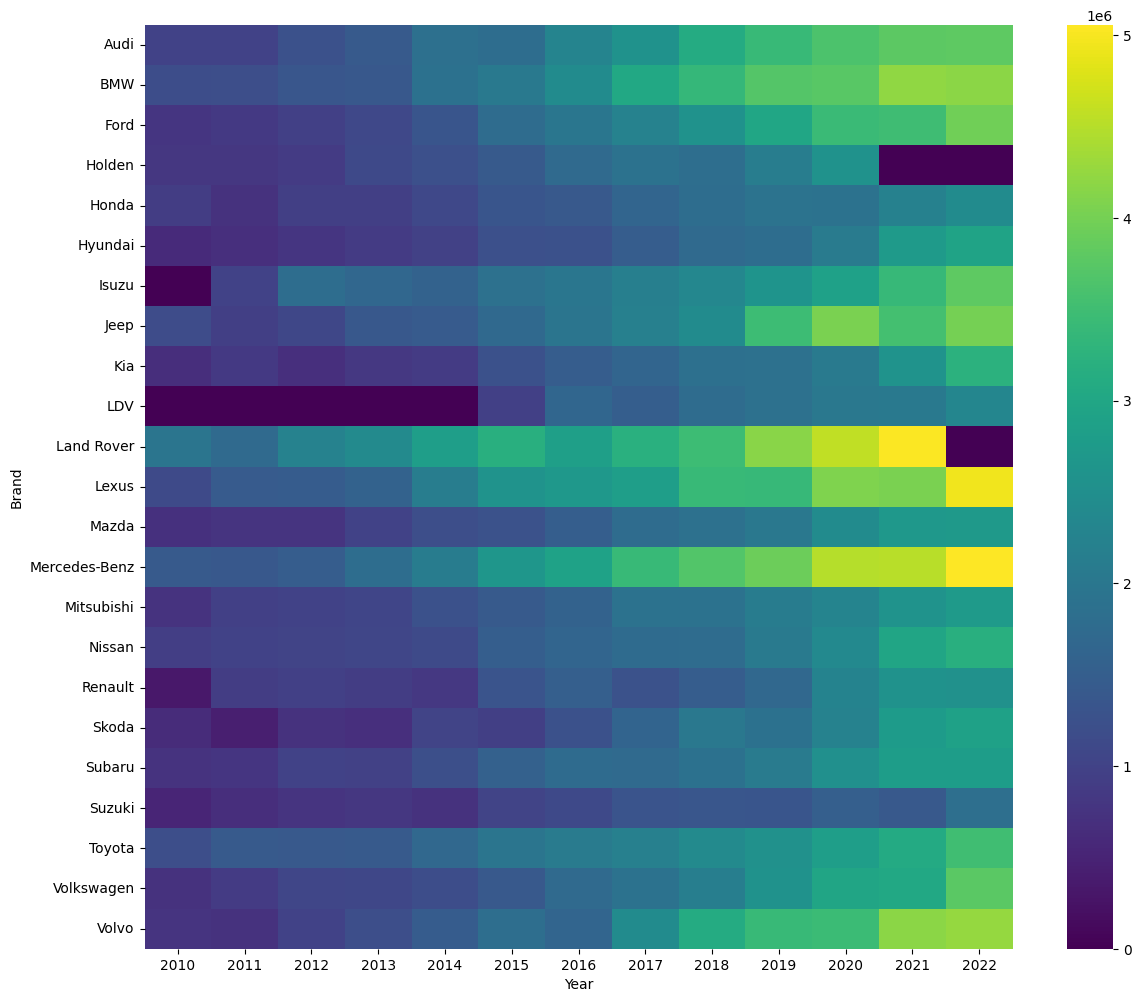

In [216]:
plt.figure(figsize=(14,12))
sns.heatmap(np.round(pd.pivot_table(df,columns="Year",index="Brand",values="Price",aggfunc="mean",fill_value=0)),cmap="viridis")
plt.show()

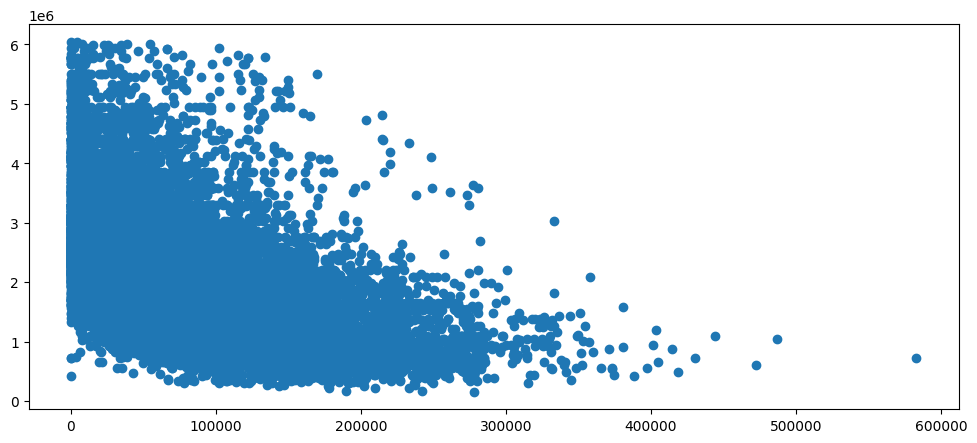

In [220]:
plt.figure(figsize=(12,5))
plt.scatter(df["Kilometers"],df["Price"])
plt.show()

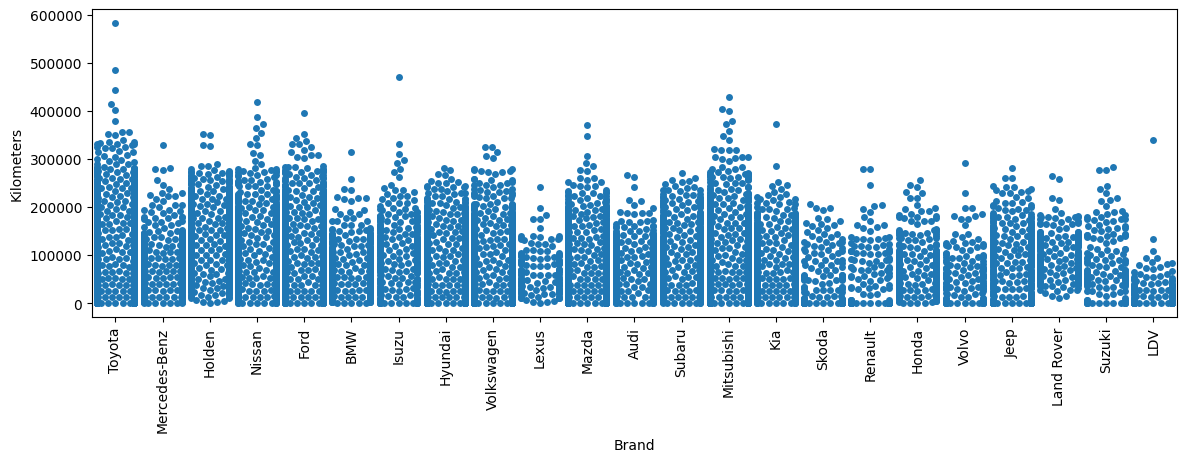

In [222]:
plt.figure(figsize=(14,4))
sns.swarmplot(df,x="Brand",y="Kilometers")
plt.xticks(rotation=90)
plt.show()

In [119]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Petrol,Used,2488,White,5


In [109]:
pd.pivot_table(df,index="Brand",columns="Year",values="Kilometers",aggfunc="mean",fill_value=0)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Brand,,,,,,,,,,,,,
Audi,145623.200000,134526.500000,126214.000000,110707.392857,98412.589744,96514.756757,77964.789474,73732.414634,59398.857143,42352.621622,25736.178571,13041.178571,2458.000000
BMW,137493.562500,133997.941176,130846.722222,121487.600000,109215.571429,93920.933333,86219.783333,70477.725000,57341.531915,53238.937500,28504.000000,13094.280000,4029.421053
Ford,202289.404762,178267.896552,169031.474359,144850.782609,144355.670732,129251.049180,117945.537975,106494.975309,93123.686391,70182.568966,45127.967742,21937.439024,4393.636364
Holden,163008.380435,165545.378947,158838.165138,144984.873874,135651.355263,126248.044444,114571.573333,101433.071895,88359.177419,69373.453333,65795.909091,0.000000,0.000000
Honda,116572.555556,141522.307692,117353.115385,128455.947368,124319.400000,90113.555556,78339.555556,60227.454545,61810.487179,45147.687500,27057.583333,10036.280000,2000.000000
Hyundai,161476.695652,152562.657895,158831.163265,135449.820896,131429.596154,106270.768293,94351.989011,88548.792857,71726.523077,62327.769231,35430.759494,14372.862069,2754.830508
Isuzu,0.000000,202338.333333,150870.000000,208226.666667,209058.777778,151733.160000,126017.051282,130866.792453,105661.729167,81177.400000,54489.470588,22116.800000,2315.950000
Jeep,170854.000000,165448.900000,153981.857143,140109.489796,123096.647059,113810.787234,109968.437500,81897.318182,62151.714286,50456.461538,33638.062500,11378.764706,1190.297872
Kia,161990.250000,159857.666667,149003.642857,140896.250000,133364.500000,119225.607843,101515.393443,90534.309735,67864.672414,55623.753623,38795.607595,20301.704545,3254.421053


In [114]:
brand_year_km=pd.pivot_table(df,index="Brand",columns="Year",values="Kilometers",aggfunc="mean",fill_value=0)

In [115]:
brand_year_km.describe()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,156829.354639,154795.118181,138284.362129,131595.204068,124179.515180,118562.542455,99265.183281,86982.269029,73697.243626,56860.701264,37760.726135,17346.655112,2711.938996
std,60384.631096,41724.464094,37673.685333,36855.969020,35326.296564,26265.503420,15181.460917,15342.178795,14163.623484,10679.770625,10771.251472,7162.153840,1710.473442
min,0.000000,0.000000,0.000000,0.000000,0.000000,81903.266667,73963.000000,60227.454545,55436.400000,41532.785714,20081.666667,0.000000,0.000000
25%,141952.016667,142809.202233,125650.333333,120198.280000,116825.791667,102989.361111,86690.891667,74696.428571,61981.100733,50372.054299,29048.717925,13067.729286,1479.336436
50%,161990.250000,159857.666667,143546.750000,137567.237288,128602.386364,114556.361111,96346.375000,85715.711111,71726.523077,56701.250000,37037.769231,18815.571429,2698.319149
75%,191685.843434,176895.353038,157671.241633,144917.828241,135247.521382,125980.330947,110264.975840,97257.709787,82453.978411,62139.502262,43894.331697,20974.675454,3861.393908
max,280000.000000,207053.390625,193752.000000,208226.666667,209058.777778,205658.000000,126017.051282,130866.792453,105661.729167,81177.400000,65795.909091,32382.416667,6743.840000


In [117]:
brand_year_km.T

Brand,Audi,BMW,Ford,Holden,Honda,Hyundai,Isuzu,Jeep,Kia,LDV,...,Mercedes-Benz,Mitsubishi,Nissan,Renault,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Year,,,,,,,,,,,,,,,,,,,,,
2010,145623.200000,137493.562500,202289.404762,163008.380435,116572.555556,161476.695652,0.000000,170854.000000,161990.250000,0.000000,...,127685.120000,205942.542857,197664.886364,280000.000000,151026.333333,191442.777778,191928.909091,207877.957143,147387.103448,175884.000000
2011,134526.500000,133997.941176,178267.896552,165545.378947,141522.307692,152562.657895,202338.333333,165448.900000,159857.666667,0.000000,...,145517.357143,192937.633333,181822.682927,123054.500000,155159.500000,175522.809524,190087.700000,207053.390625,174444.673913,172623.875000
2012,126214.000000,130846.722222,169031.474359,158838.165138,117353.115385,158831.163265,150870.000000,153981.857143,149003.642857,0.000000,...,124813.000000,193752.000000,174599.771429,95561.666667,147929.285714,156511.320000,142486.466667,177761.242105,143546.750000,116239.000000
2013,110707.392857,121487.600000,144850.782609,144984.873874,128455.947368,135449.820896,208226.666667,140109.489796,140896.250000,0.000000,...,118908.960000,159304.367647,150829.890625,109955.000000,142759.857143,166431.000000,126659.250000,153526.809917,137567.237288,91308.000000
2014,98412.589744,109215.571429,144355.670732,135651.355263,124319.400000,131429.596154,209058.777778,123096.647059,133364.500000,0.000000,...,110796.000000,147243.542857,146859.323077,117992.916667,115658.666667,131738.972222,125789.333333,145206.330275,133012.296296,89576.285714
2015,96514.756757,93920.933333,129251.049180,126248.044444,90113.555556,106270.768293,151733.160000,113810.787234,119225.607843,205658.000000,...,101655.500000,147910.752941,123580.897436,144699.333333,122540.428571,105456.909091,97180.125000,125712.617450,114556.361111,104323.222222
2016,77964.789474,86219.783333,117945.537975,114571.573333,78339.555556,94351.989011,126017.051282,109968.437500,101515.393443,73963.000000,...,87162.000000,122688.709677,111753.703125,108848.454545,110257.142857,93516.596491,83531.750000,110272.808824,108738.144737,91578.923077
2017,73732.414634,70477.725000,106494.975309,101433.071895,60227.454545,88548.792857,130866.792453,81897.318182,90534.309735,74135.000000,...,73717.043478,100389.460938,99678.880342,80127.166667,95392.888889,91812.522388,72134.600000,99122.530686,90054.474227,77913.000000
2018,59398.857143,57341.531915,93123.686391,88359.177419,61810.487179,71726.523077,105661.729167,62151.714286,67864.672414,72279.700000,...,70215.727273,80111.758065,79100.403509,101516.818182,86266.333333,75017.950617,55436.400000,84796.198758,71780.297101,59324.944444


In [118]:
brand_year_km.T.describe()

Brand,Audi,BMW,Ford,Holden,Honda,Hyundai,Isuzu,Jeep,Kia,LDV,...,Mercedes-Benz,Mitsubishi,Nissan,Renault,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,77437.113798,79989.846882,109788.622305,102600.721783,77150.456128,93502.632954,111144.010098,93690.979832,95555.983060,41270.873667,...,81117.751984,114613.341160,107456.069951,101719.896075,95469.916536,100482.242416,90475.984173,110318.976667,95049.481344,82982.832109
std,46735.566160,46398.545659,60888.709891,56333.582214,47035.260743,54066.149927,74958.182310,58000.375994,54219.456831,58400.972685,...,46255.464998,66836.023195,62480.254001,66570.404920,52236.370885,61076.499505,62388.971602,67435.737181,54118.752966,53219.511666
min,2458.000000,4029.421053,4393.636364,0.000000,2000.000000,2754.830508,0.000000,1190.297872,3254.421053,0.000000,...,6743.840000,2698.319149,4399.050000,943.417910,1120.393443,3760.823529,1768.375000,3961.964286,3014.885965,3561.718750
25%,42352.621622,53238.937500,70182.568966,69373.453333,45147.687500,62327.769231,54489.470588,50456.461538,55623.753623,0.000000,...,51282.888889,61951.235294,59067.076087,75418.375000,57162.315789,56701.250000,50287.647059,59276.535484,58048.875000,47403.125000
50%,77964.789474,86219.783333,117945.537975,114571.573333,78339.555556,94351.989011,126017.051282,109968.437500,101515.393443,19068.535714,...,87162.000000,122688.709677,111753.703125,101516.818182,110257.142857,93516.596491,83531.750000,110272.808824,108738.144737,89576.285714
75%,110707.392857,121487.600000,144850.782609,144984.873874,117353.115385,135449.820896,151733.160000,140109.489796,140896.250000,72279.700000,...,118908.960000,159304.367647,150829.890625,117992.916667,142759.857143,156511.320000,126659.250000,153526.809917,137567.237288,104323.222222
max,145623.200000,137493.562500,202289.404762,165545.378947,141522.307692,161476.695652,209058.777778,170854.000000,161990.250000,205658.000000,...,145517.357143,205942.542857,197664.886364,280000.000000,155159.500000,191442.777778,191928.909091,207877.957143,174444.673913,175884.000000


In [124]:
stat_val,p_val=spearmanr(df["Price"],df["Kilometers"])

In [125]:
stat_val,p_val

(np.float64(-0.5737494394305769), np.float64(0.0))

In [126]:
np.corrcoef(df["Price"],df["Kilometers"])

array([[ 1.        , -0.51590599],
       [-0.51590599,  1.        ]])

In [127]:
df.groupby("Gearbox")["Price"].mean()

Gearbox
Automatic    2.054405e+06
Manual       1.608092e+06
Name: Price, dtype: float64

In [128]:
np.round(df.groupby("Gearbox")["Price"].mean())

Gearbox
Automatic    2054405.0
Manual       1608092.0
Name: Price, dtype: float64

In [130]:
np.round(df.groupby("Gearbox")[["Price","Kilometers"]].mean())

,Price,Kilometers
Gearbox,,
Automatic,2054405.0,86991.0
Manual,1608092.0,130208.0


In [131]:
np.round(df.groupby("Gearbox")[["Price","Kilometers"]].describe())

Price                                                        \
             count       mean        std       min        25%        50%   
Gearbox                                                                    
Automatic  12319.0  2054405.0  1057488.0  154112.0  1265370.0  1816265.0   
Manual      1746.0  1608092.0  1073571.0  165065.0   825325.0  1348480.0   

                                Kilometers                                   \
                 75%        max      count      mean      std  min      25%   
Gearbox                                                                       
Automatic  2613987.0  6043392.0    12319.0   86991.0  62667.0  2.0  40364.0   
Manual     2090970.0  5998810.0     1746.0  130208.0  76630.0  5.0  73980.0   

                                         
                50%       75%       max  
Gearbox                                  
Automatic   76774.0  124204.0  583000.0  
Manual     124853.0  178605.0  487000.0

In [132]:
np.round(df.groupby("Gearbox")[["Price","Kilometers"]].describe()).T

Gearbox           Automatic     Manual
Price      count    12319.0     1746.0
           mean   2054405.0  1608092.0
           std    1057488.0  1073571.0
           min     154112.0   165065.0
           25%    1265370.0   825325.0
           50%    1816265.0  1348480.0
           75%    2613987.0  2090970.0
           max    6043392.0  5998810.0
Kilometers count    12319.0     1746.0
           mean     86991.0   130208.0
           std      62667.0    76630.0
           min          2.0        5.0
           25%      40364.0    73980.0
           50%      76774.0   124853.0
           75%     124204.0   178605.0
           max     583000.0   487000.0

In [135]:
np.round(df.groupby("Gearbox")[["Price","Kilometers"]].describe()).T.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Gearbox,,,,,,,,,,,,,,,,
level_0,Price,Price,Price,Price,Price,Price,Price,Price,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers
level_1,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
Automatic,12319.0,2054405.0,1057488.0,154112.0,1265370.0,1816265.0,2613987.0,6043392.0,12319.0,86991.0,62667.0,2.0,40364.0,76774.0,124204.0,583000.0
Manual,1746.0,1608092.0,1073571.0,165065.0,825325.0,1348480.0,2090970.0,5998810.0,1746.0,130208.0,76630.0,5.0,73980.0,124853.0,178605.0,487000.0


In [142]:
df.groupby("Gearbox")[["Price","Kilometers"]].describe().T.reset_index().T.iloc[:, 1:8]

,1,2,3,4,5,6,7
Gearbox,,,,,,,
level_0,Price,Price,Price,Price,Price,Price,Price
level_1,mean,std,min,25%,50%,75%,max
Automatic,2054405.499044,1057488.010634,154112.0,1265369.6,1816264.96,2613987.2,6043392.0
Manual,1608091.543459,1073571.119768,165064.96,825324.8,1348480.0,2090969.6,5998809.6


In [143]:
df.groupby("Gearbox")[["Price","Kilometers"]].describe().T.reset_index().T.iloc[:, 9:]

,9,10,11,12,13,14,15
Gearbox,,,,,,,
level_0,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers,Kilometers
level_1,mean,std,min,25%,50%,75%,max
Automatic,86990.552399,62667.498195,2.0,40364.0,76774.0,124204.0,583000.0
Manual,130208.065292,76629.795766,5.0,73980.5,124853.0,178604.75,487000.0


In [146]:
np.round(df.groupby("Fuel")["Price"].describe())

,count,mean,std,min,25%,50%,75%,max
Fuel,,,,,,,,
Diesel,5368.0,2328590.0,1080609.0,154112.0,1540570.0,2195436.0,2916570.0,6043392.0
Hybrid,403.0,2846606.0,1023035.0,715520.0,2140396.0,2586330.0,3300474.0,5992755.0
Liquid Petroleum Gas,26.0,1002863.0,308828.0,440320.0,770133.0,973878.0,1178599.0,1648448.0
Petrol,5641.0,1492490.0,734897.0,165065.0,935625.0,1375945.0,1857490.0,5448410.0
Premium Petrol,2627.0,2292991.0,1200062.0,373722.0,1375450.0,2035930.0,3026650.0,6043392.0


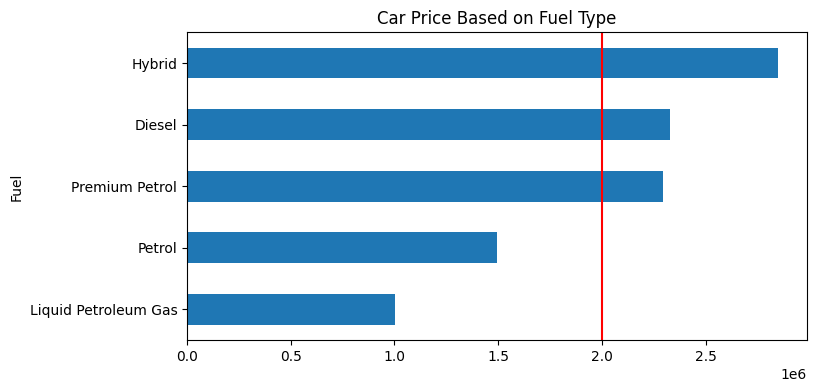

In [154]:
plt.figure(figsize=(8,4))
df.groupby("Fuel")["Price"].mean().sort_values().plot(kind="barh")
plt.axvline(df["Price"].mean(),color="red")
plt.title("Car Price Based on Fuel Type")
plt.show()

In [156]:
pd.crosstab(df["Brand"],df["Fuel"])

Fuel,Diesel,Hybrid,Liquid Petroleum Gas,Petrol,Premium Petrol
Brand,,,,,
Audi,106,17,0,0,303
BMW,167,9,0,19,204
Ford,899,1,15,218,165
Holden,405,0,11,612,179
Honda,2,0,0,281,30
Hyundai,282,0,0,691,38
Isuzu,265,0,0,0,0
Jeep,97,0,0,148,108
Kia,179,2,0,547,0


<Axes: xlabel='count', ylabel='Brand'>

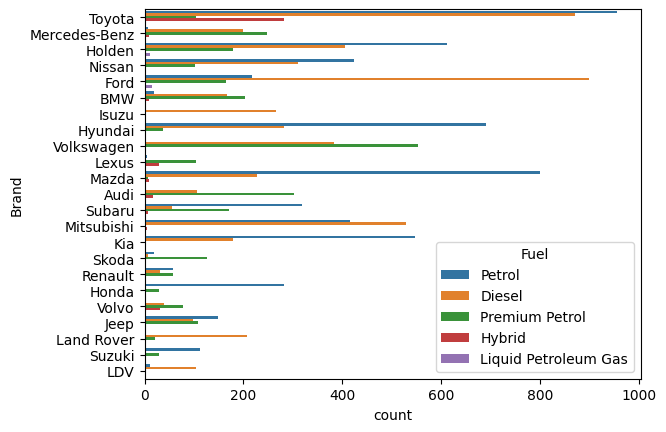

In [158]:
sns.countplot(df,y="Brand",hue="Fuel")

<Axes: xlabel='count', ylabel='Brand'>

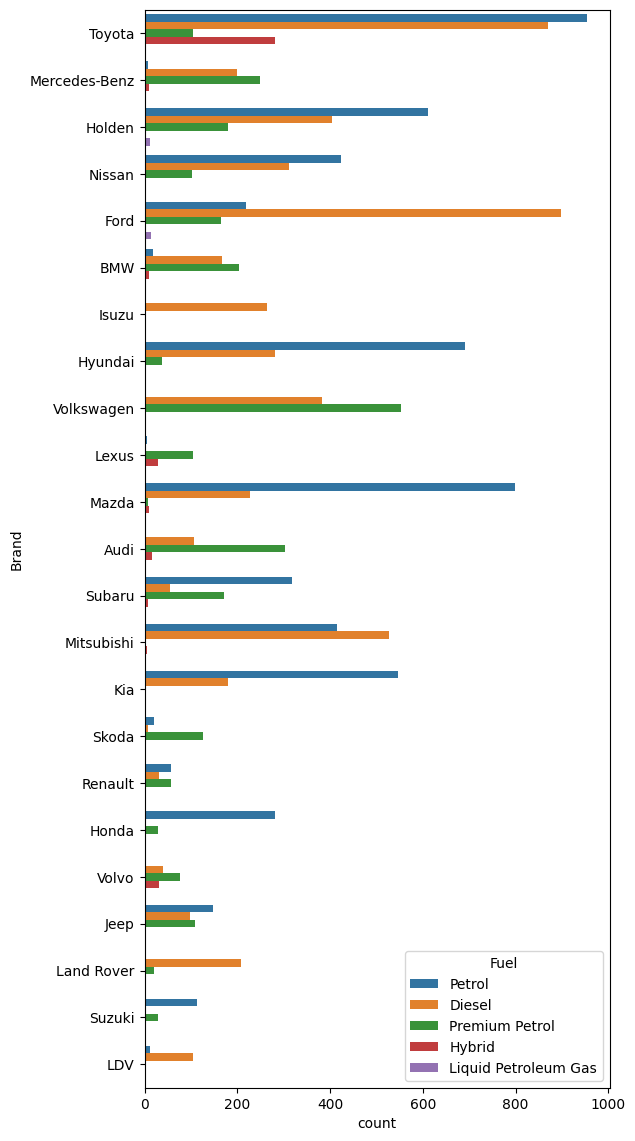

In [161]:
plt.figure(figsize=(6,14))
sns.countplot(df,y="Brand",hue="Fuel")

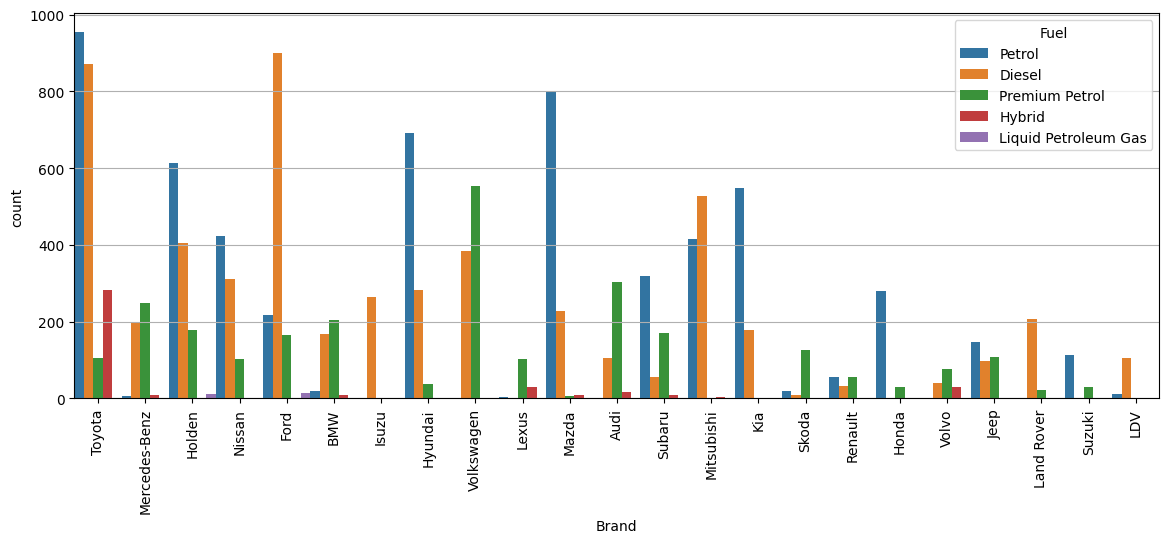

In [163]:
plt.figure(figsize=(14,5))
sns.countplot(df,x="Brand",hue="Fuel",width=1)
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.show()

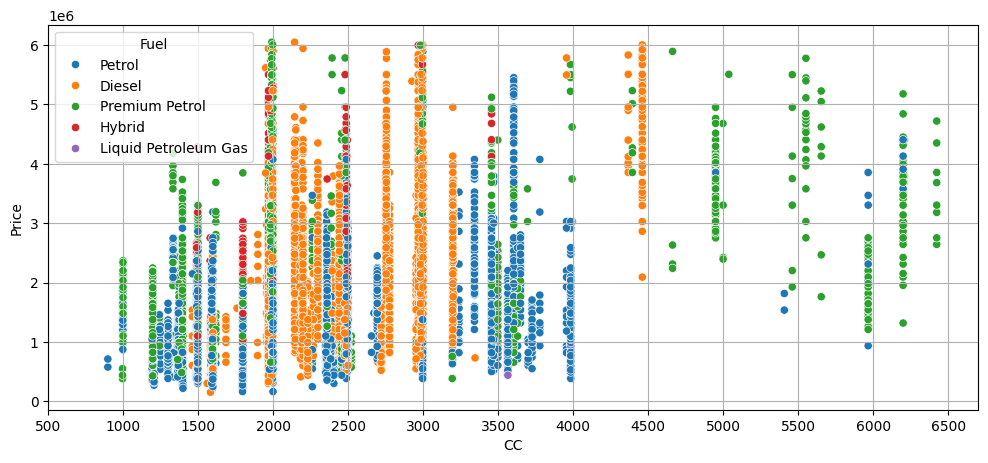

In [171]:
plt.figure(figsize=(12,5))
sns.scatterplot(df,x="CC",y="Price",hue="Fuel")
plt.xticks(range(500,7000,500))
plt.grid()
plt.show()

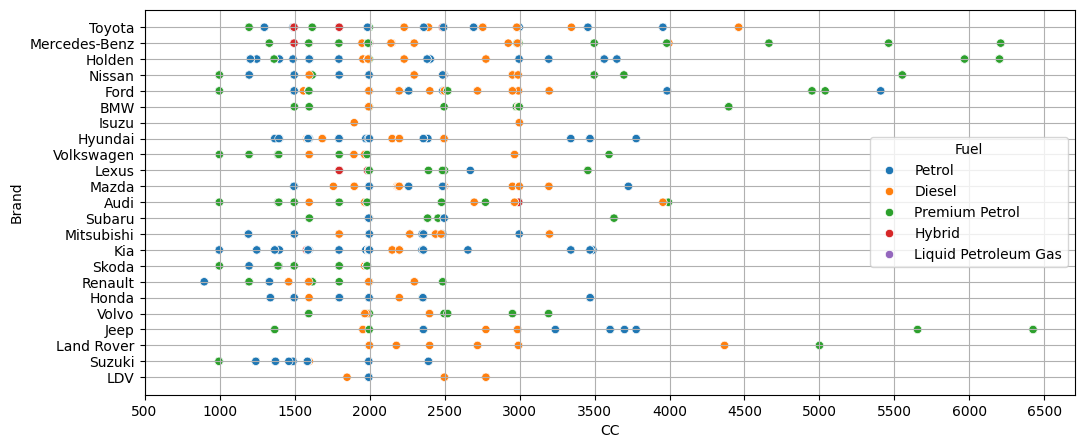

In [172]:
plt.figure(figsize=(12,5))
sns.scatterplot(df,x="CC",y="Brand",hue="Fuel")
plt.xticks(range(500,7000,500))
plt.grid()
plt.show()

In [173]:
pd.crosstab(df["Brand"],df["CC"],values=df["Price"],aggfunc="mean")

CC,898,996,998,999,1193,1197,1198,1206,1242,1248,...,5000,5038,5408,5461,5552,5654,5967,6200,6208,6424
Brand,,,,,,,,,,,,,,,,,,,,,
Audi,NaN,NaN,NaN,1.197854e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ford,NaN,NaN,9.546871e+05,1.818129e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5503449.6,1675830.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369749.546667,NaN,5.867264e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,2.152633e+06,3.360265e+06,NaN,NaN
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isuzu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.932089e+06,NaN,NaN,NaN,3559340.48
Kia,NaN,NaN,1.518464e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.057558e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df["CC"].describe()

count    14065.000000
mean      2406.079701
std        779.603949
min        898.000000
25%       1987.000000
50%       2199.000000
75%       2776.000000
max       6424.000000
Name: CC, dtype: float64

In [184]:
df["Engine Capacity"]=pd.cut(df["CC"],bins=6,retbins=True,labels=["0.8L to 1.8L","1.8L to 2.7L","2.7L to 3.6L","3.6L to 4.5L","4.5L to 5.5L","5.5L to 6.4L"])[0]

In [185]:
df["Engine Capacity"]=pd.cut(df["CC"],bins=6,retbins=True,
                             labels=["0.8L to 1.8L","1.8L to 2.7L","2.7L to 3.6L","3.6L to 4.5L","4.5L to 5.5L","5.5L to 6.4L"])[0]

In [186]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Engine Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Petrol,Used,2362,Grey,5,1.8L to 2.7L
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,1.8L to 2.7L
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,1.8L to 2.7L
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Petrol,Used,1796,White,5,0.8L to 1.8L
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Petrol,Used,2488,White,5,1.8L to 2.7L


In [189]:
np.round(pd.pivot_table(df,columns="Engine Capacity",index="Brand",values="Price",aggfunc="mean"))

Engine Capacity,0.8L to 1.8L,1.8L to 2.7L,2.7L to 3.6L,3.6L to 4.5L,4.5L to 5.5L,5.5L to 6.4L
Brand,,,,,,
Audi,1876807.0,2643000.0,2836897.0,4907889.0,NaN,NaN
BMW,2404185.0,2583894.0,3325281.0,4507556.0,NaN,NaN
Ford,1045383.0,2137276.0,2443727.0,1291650.0,3625830.0,NaN
Holden,762147.0,919184.0,1575488.0,NaN,NaN,2639430.0
Honda,1587813.0,1415994.0,1259976.0,NaN,NaN,NaN
Hyundai,1145244.0,1753376.0,2355446.0,3279806.0,NaN,NaN
Isuzu,NaN,2035930.0,2375543.0,NaN,NaN,NaN
Jeep,1144271.0,1544651.0,2354557.0,1109746.0,NaN,3733290.0
Kia,1070737.0,1691457.0,2334664.0,NaN,NaN,NaN


In [190]:
np.round(pd.pivot_table(df,columns="Engine Capacity",index="Brand",values="Price",aggfunc="count"))

Engine Capacity,0.8L to 1.8L,1.8L to 2.7L,2.7L to 3.6L,3.6L to 4.5L,4.5L to 5.5L,5.5L to 6.4L
Brand,,,,,,
Audi,130,213,79,4,0,0
BMW,26,269,99,5,0,0
Ford,116,543,446,109,84,0
Holden,272,164,642,0,0,129
Honda,217,91,5,0,0,0
Hyundai,332,663,12,4,0,0
Isuzu,0,1,264,0,0,0
Jeep,5,75,243,15,0,15
Kia,120,492,116,0,0,0


<Axes: ylabel='Engine Capacity'>

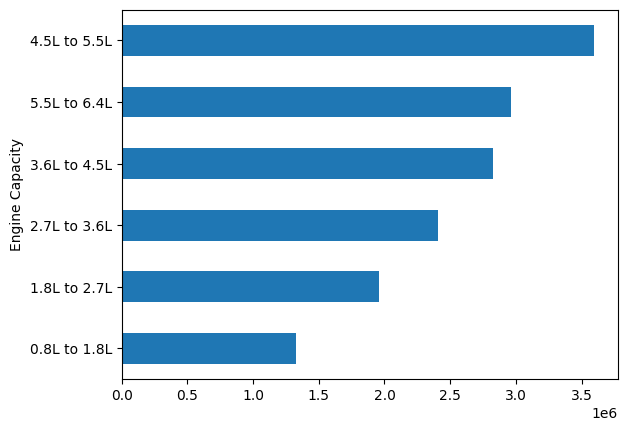

In [193]:
df.groupby("Engine Capacity")["Price"].mean().sort_values().plot.barh()

<Axes: ylabel='Engine Capacity'>

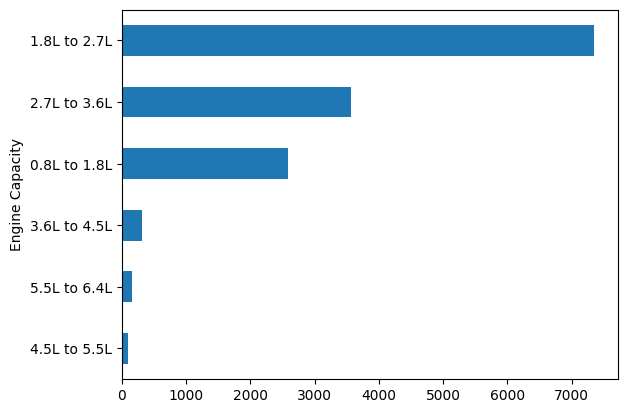

In [194]:
df.groupby("Engine Capacity")["Price"].count().sort_values().plot.barh()

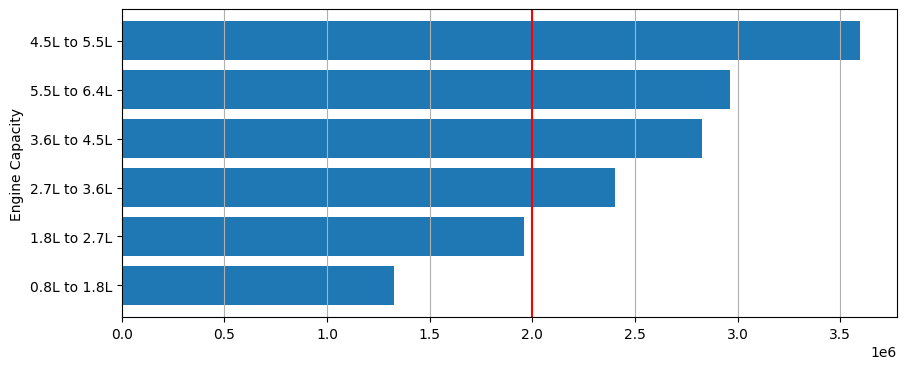

In [195]:
plt.figure(figsize=(10,4))
df.groupby("Engine Capacity")["Price"].mean().sort_values().plot.barh(width=0.8)
plt.grid(axis="x")
plt.axvline(df["Price"].mean(),color="red")
plt.show()

In [200]:
eng_cap_price=df.groupby("Engine Capacity")["Price"].mean().sort_index().reset_index()
eng_cap_price["Count"]=df["Engine Capacity"].value_counts().sort_index().values

In [201]:
eng_cap_price

,Engine Capacity,Price,Count
0,0.8L to 1.8L,1.324065e+06,2581
1,1.8L to 2.7L,1.961100e+06,7347
2,2.7L to 3.6L,2.404746e+06,3563
3,3.6L to 4.5L,2.827429e+06,309
4,4.5L to 5.5L,3.594839e+06,100
5,5.5L to 6.4L,2.964058e+06,165


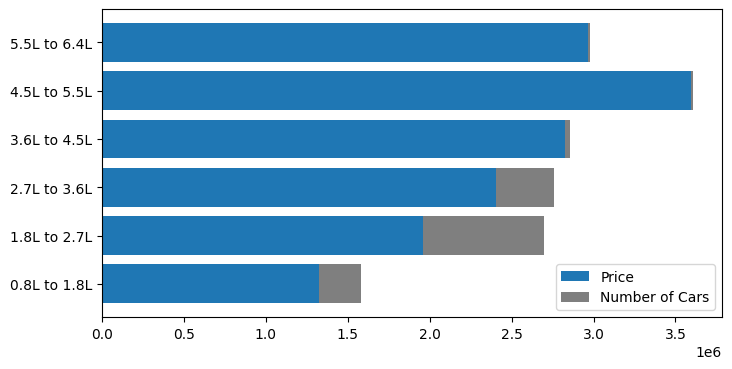

In [206]:
plt.figure(figsize=(8,4))
plt.barh(eng_cap_price["Engine Capacity"],eng_cap_price["Price"],label="Price")
plt.barh(eng_cap_price["Engine Capacity"],np.array(eng_cap_price["Count"])*100,left=eng_cap_price["Price"],
         color="black",alpha=0.5,label="Number of Cars")
plt.legend()
plt.show()